HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

* Countries need to be clustered which will give better insights in choosing the countries in the need of aid
* Steps performed:
  - Data Understanding and Cleaning
  - Data Manipulation
  - Univariate & Bivariate analysis
  - Outlier Analysis
  - Modelling
  - Determining countries in need of aid

In [60]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [61]:
country=pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [62]:
country.shape

(167, 10)

In [63]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [64]:
# As exports, health and imports are given as percentages of gdpp, converting them to their actual values
country['exports']=country['exports']/100*country['gdpp']
country['health']=country['health']/100*country['gdpp']
country['imports']=country['imports']/100*country['gdpp']
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [65]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [66]:
# Checking for duplicates
country[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [67]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


   # Univariate Analysis
 * plotting distplot of all the variables 

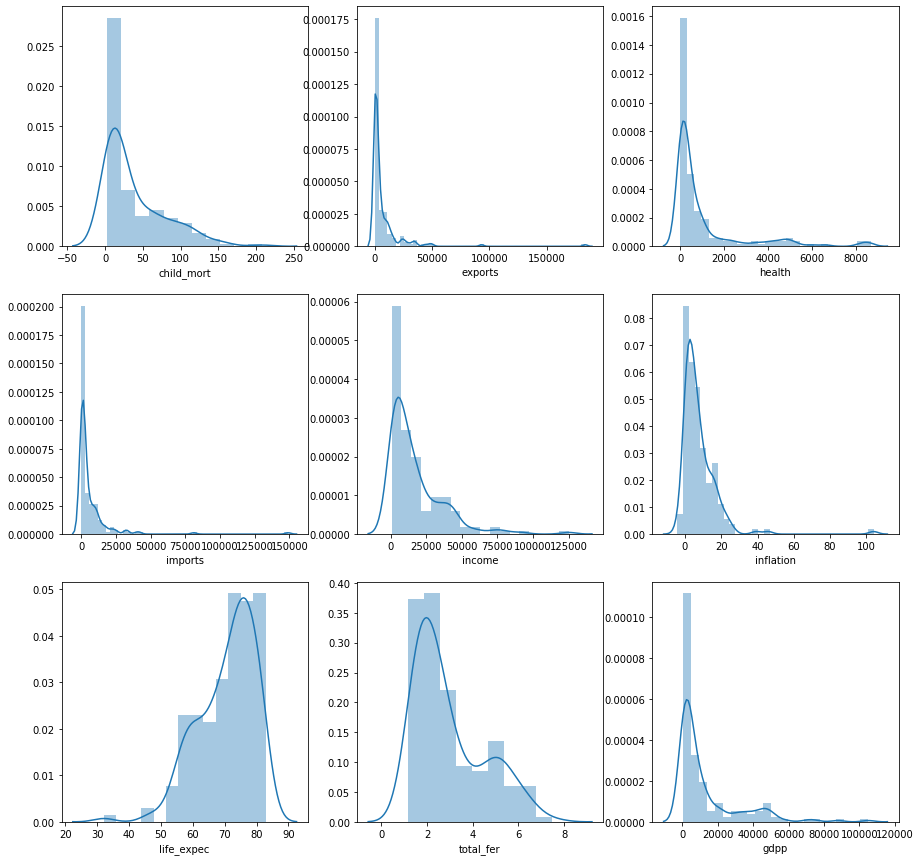

In [68]:

plt.figure(figsize=[15,15])
for i in enumerate(country.drop('country',axis=1)):
    
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])
    
plt.show()



* The data is mostly skewed, of all the variables. 


# Bivariate Analysis

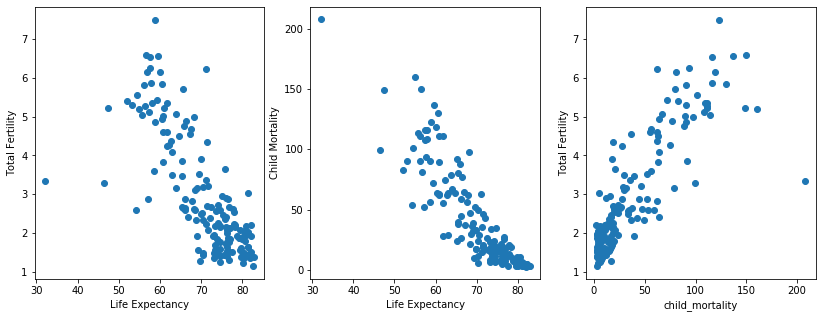

In [69]:
plt.figure(figsize=[14,5])
plt.subplot(1,3,1)
plt.scatter(x='life_expec',y='total_fer',data=country)
plt.xlabel('Life Expectancy')
plt.ylabel('Total Fertility')

plt.subplot(1,3,2)
plt.scatter(x='life_expec',y='child_mort',data=country)
plt.xlabel('Life Expectancy')
plt.ylabel('Child Mortality')

plt.subplot(1,3,3)
plt.scatter(x='child_mort',y='total_fer',data=country)
plt.xlabel('child_mortality')
plt.ylabel('Total Fertility')

plt.show()

* The total fertility is high where the life expectancy is low and vice versa
* The Child Mortality is high when life expectancy is low which makes sense
* With child Mortality, the total fertility increases.

In [70]:
# Binning income into categorical variables to perform Categorical-Numerical BiVariate Analysis
country['incomecat']=pd.qcut(country['income'],q=[0,0.33,0.66,1],labels=['Low','Medium','High'])
country['incomecat'].value_counts()

High      57
Medium    55
Low       55
Name: incomecat, dtype: int64

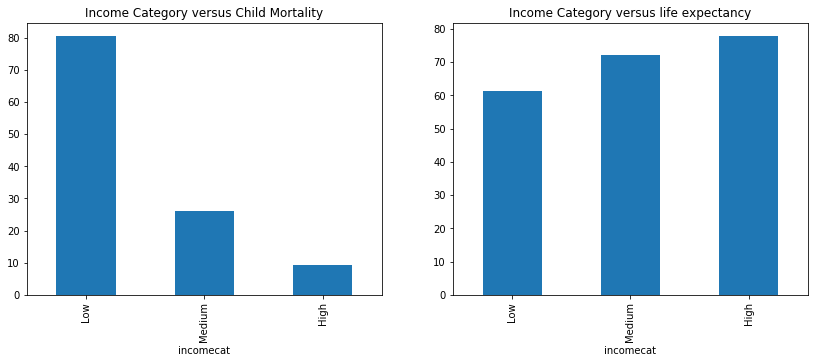

In [71]:
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
country.groupby(by='incomecat')['child_mort'].mean().plot.bar()
plt.title("Income Category versus Child Mortality")
plt.subplot(1,2,2)
country.groupby(by='incomecat')['life_expec'].mean().plot.bar()
plt.title("Income Category versus life expectancy")
plt.show()

* Child Mortality is low when income is high and vice versa.
* Life expectancy is high when income is high

In [72]:
country.drop('incomecat',axis=1,inplace=True)

# Outlier Analysis

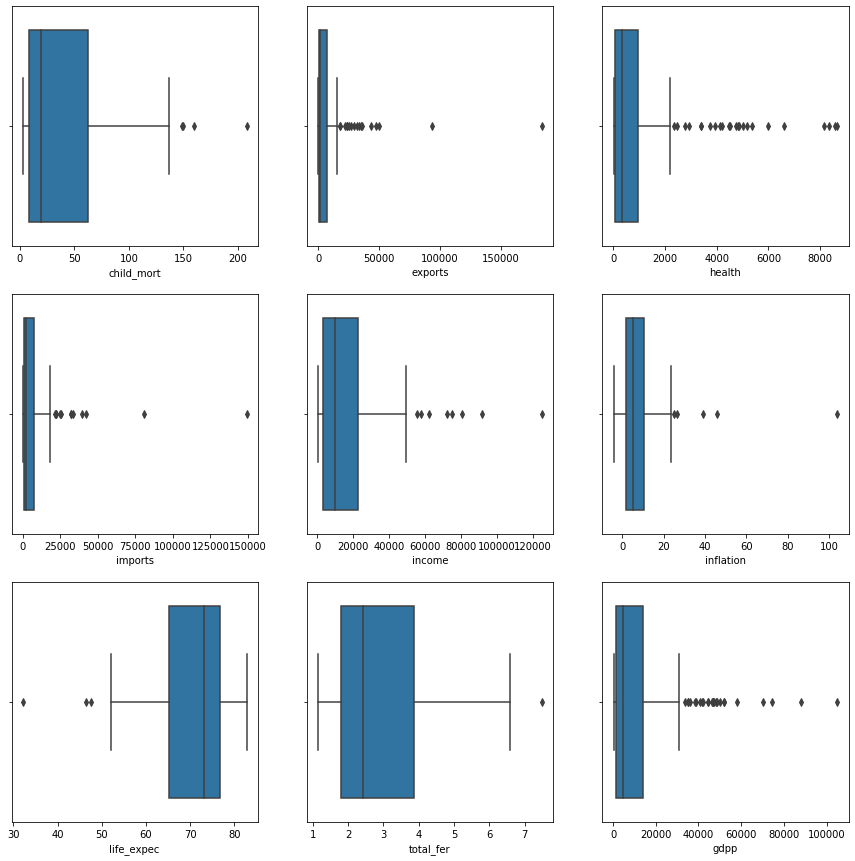

In [73]:
plt.figure(figsize=[15,15])
for i in enumerate(country.drop(['country'],axis=1)):
    
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])
    
plt.show()

There are outliers in all the variables, however as different variables have different requirement.
* Outliers w.r.t.Life Expectancy at the higher end can be ignored wheras the lower end needs to be considered.
* Outliers w.r.t.Income and gdpp at the higher end can be ignored wheras the lower end needs to be considered.
* Outliers w.r.t.Child Mortality at the lower end can be ignored wheras the higher end needs to be considered.

Currently, proceeding with the outliers to perform the clustering action

In [74]:
country['income'].describe(percentiles=[0,0.25,0.50,0.75,0.90,0.95,0.99,1])

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
0%          609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
90%       41220.000000
95%       48290.000000
99%       84374.000000
100%     125000.000000
max      125000.000000
Name: income, dtype: float64

In [75]:
country['gdpp'].describe(percentiles=[0,0.25,0.50,0.75,0.90,0.95,0.99,1])

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
0%          231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
90%       41840.000000
95%       48610.000000
99%       79088.000000
100%     105000.000000
max      105000.000000
Name: gdpp, dtype: float64

In [76]:
# Scaling the numeric variables of the dataframe using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
country_scaled = ss.fit_transform(country.drop('country', axis=1))

In [77]:
country_scaled=pd.DataFrame(country_scaled)
country_scaled.columns=country.drop('country',axis=1).columns

In [78]:
country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [79]:
# Checking for Hopkins Value
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [80]:
hopkins(country_scaled)


0.9249598449995552

In [81]:
from sklearn.cluster import KMeans

In [82]:
# Obtaining silhouette score to determine number of clusters to be used
from sklearn.metrics import silhouette_score
sil=[]
for k in range(2,10):
    kmean=KMeans(n_clusters=k).fit(country_scaled)
    sil.append([k,silhouette_score(country_scaled,kmean.labels_)])
sil=pd.DataFrame(sil)
sil.head()

,0,1
0,2,0.458633
1,3,0.421862
2,4,0.427752
3,5,0.430775
4,6,0.392794


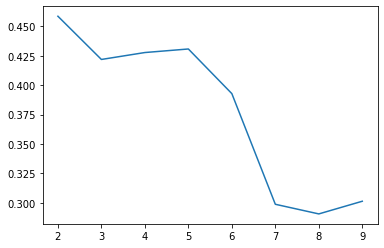

In [83]:
# Plotting Silhouette Score against each k value
plt.plot(sil[0],sil[1])

In [84]:
# As per Silhouette Score,5 seems to be an apt number of k
# Going by the elbow curve method, taking k=3

kmean_s = KMeans(n_clusters = 5, random_state = 0)
kmean_s.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [85]:
country['labels_s']=kmean_s.labels_
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,3


In [86]:
country['labels_s'].value_counts()

1    86
3    47
0    30
2     3
4     1
Name: labels_s, dtype: int64

* Cluster 2 and 4 are low on data and might be better clustered with others

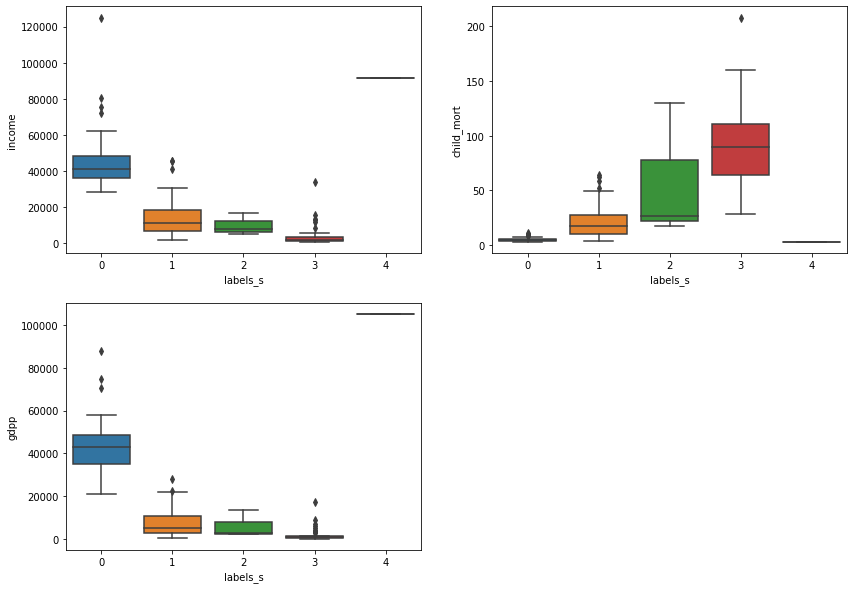

In [87]:
# plotting data against the clusters formed
plt.figure(figsize = (14, 10))
for i in enumerate(['income','child_mort','gdpp']):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'labels_s', y = i[1], data =country)

In [88]:
# Understanding the clusters formed
country.groupby('labels_s')[['income','child_mort','gdpp']].mean()

,income,child_mort,gdpp
labels_s,,,
0,46676.666667,5.006667,44103.333333
1,13486.976744,20.902326,7315.372093
2,9786.666667,57.733333,6160.000000
3,3870.702128,90.793617,1900.255319
4,91700.000000,2.800000,105000.000000


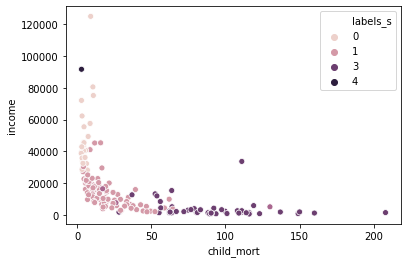

In [89]:

sns.scatterplot(x = 'child_mort', y = 'income', data = country, hue = 'labels_s' )




In [90]:
final_s=country[country["labels_s"]==3]

In [91]:
final_s.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,3.0
std,34.216049,2276.416915,167.307043,1556.374345,5647.521191,7.270383,6.451209,1.039746,2956.878726,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,3.0
25%,63.650000,102.497500,33.329850,193.061000,1390.000000,4.010000,56.650000,4.440000,550.000000,3.0
50%,89.300000,196.176000,50.958000,324.912000,1850.000000,8.790000,59.500000,5.050000,897.000000,3.0
75%,111.000000,500.590000,89.765000,867.600000,3345.000000,16.350000,62.850000,5.495000,1385.000000,3.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,26.500000,71.100000,7.490000,17100.000000,3.0


In [92]:
# Using Elbow Curve method to determine k

ssd = []
for k in range(2, 10):
    kmean = KMeans(n_clusters = k).fit(country_scaled)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)

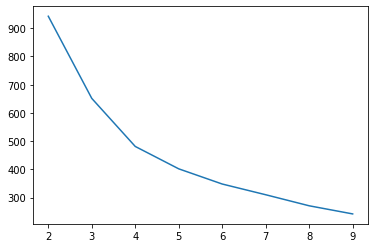

In [93]:
#plotting k means against different values of k 
plt.plot(ssd[0], ssd[1])

In [94]:
# Going by the elbow curve method, taking k=3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [95]:
pd.Series( kmean.labels_)

0      0
1      2
2      2
3      0
4      2
      ..
162    2
163    2
164    2
165    0
166    0
Length: 167, dtype: int32

In [96]:
country['labels']=kmean.labels_

In [97]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,2


In [98]:
country.labels.value_counts()

2    91
0    48
1    28
Name: labels, dtype: int64

In [99]:
# Understanding the clusters formed
country.groupby('labels')[['income','child_mort','gdpp']].mean()

,income,child_mort,gdpp
labels,,,
0,3897.354167,91.610417,1909.208333
1,50178.571429,5.046429,48114.285714
2,13968.021978,20.357143,7979.912088


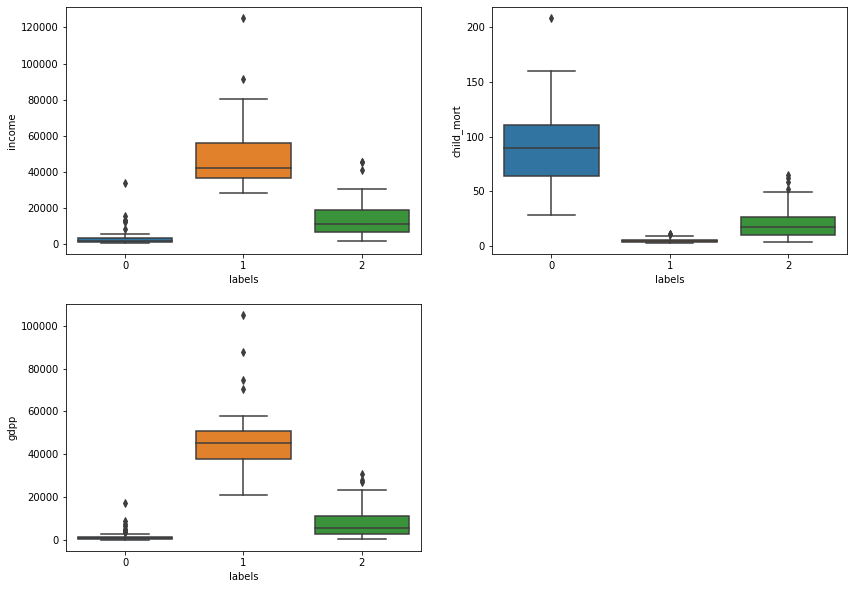

In [100]:
# plotting data against the clusters formed
plt.figure(figsize = (14, 10))
for i in enumerate(['income','child_mort','gdpp']):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'labels', y = i[1], data =country)

In [101]:
#taking 0 as this label consists of countries with high mortality, low income and low gdpp
final=country[country.labels==0]

In [102]:
final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.979167,0.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.144338,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.000000,0.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,3.000000,0.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,3.000000,0.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,3.000000,0.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,3.000000,0.0


In [103]:
final_s.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,3.0
std,34.216049,2276.416915,167.307043,1556.374345,5647.521191,7.270383,6.451209,1.039746,2956.878726,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,3.0
25%,63.650000,102.497500,33.329850,193.061000,1390.000000,4.010000,56.650000,4.440000,550.000000,3.0
50%,89.300000,196.176000,50.958000,324.912000,1850.000000,8.790000,59.500000,5.050000,897.000000,3.0
75%,111.000000,500.590000,89.765000,867.600000,3345.000000,16.350000,62.850000,5.495000,1385.000000,3.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,26.500000,71.100000,7.490000,17100.000000,3.0


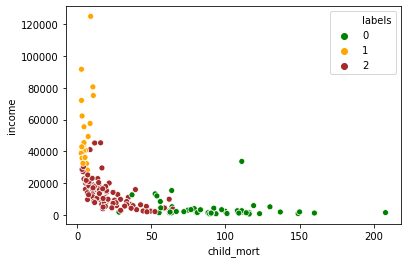

In [104]:

sns.scatterplot(x = 'child_mort', y = 'income', data = country, hue = 'labels', palette = ['green', 'orange', 'brown'])




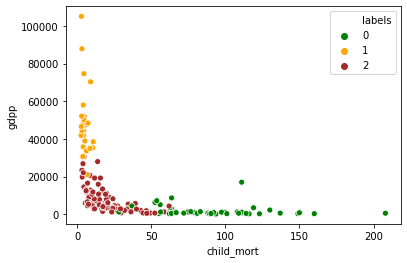

In [105]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', data = country, hue = 'labels', palette = ['green', 'orange', 'brown'])

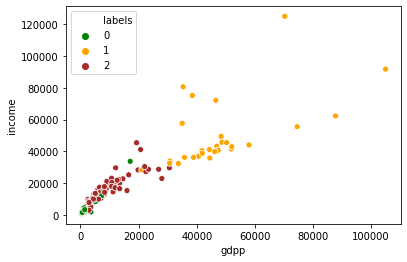

In [106]:
sns.scatterplot(x = 'gdpp', y = 'income', data = country, hue = 'labels', palette = ['green', 'orange', 'brown'])

Text(0.5, 1.0, 'K-means Clustering using 5 clusters')

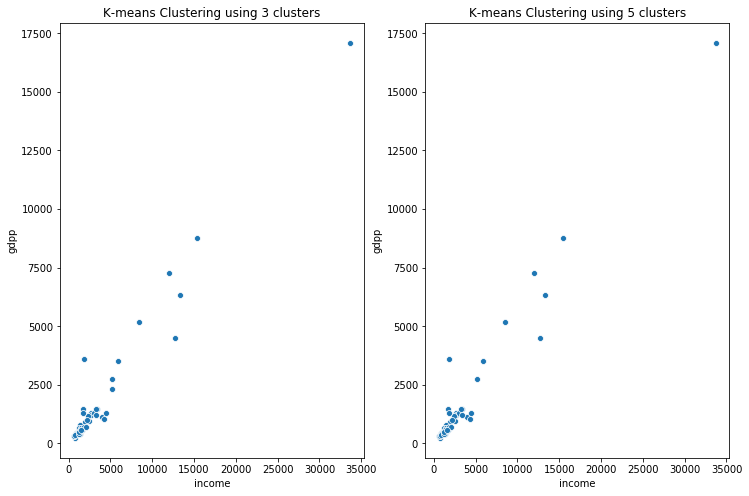

In [107]:
# list of countries which needs to be focussed on and comparing both k=3 and k=5
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
sns.scatterplot(x='income',y='gdpp',data=final)
plt.title("K-means Clustering using 3 clusters")

plt.subplot(1,2,2)
sns.scatterplot(x='income',y='gdpp',data=final_s)
plt.title("K-means Clustering using 5 clusters")

* Similar results are observed using both k=3 and k=5.
* On using k=5, there are 2 clusters formed with fewer data which can be classified along with the other clusters instead.
* Hence, proceeding with k=3.

In [108]:
# sorting data to get the desired countries.
final.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,3,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,3,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,3,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,3,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,3,0


# Hierarchical Clustering

In [109]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [110]:
# performing hierarchical clustering

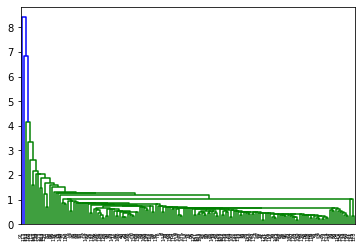

In [111]:
# Single linkage hierarchical clustering
mergings=linkage(country_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

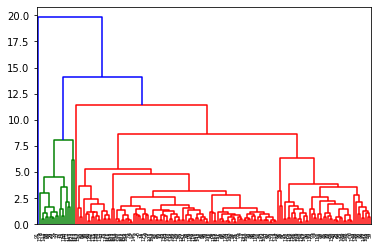

In [112]:
# Complete linkage hierarchical clustering
mergings=linkage(country_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [113]:
#Taking number of clusters as 3
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1)

In [114]:
country['cluster_labels']=cluster_labels

In [115]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,2,0


In [116]:
country['cluster_labels'].value_counts()

0    148
1     18
2      1
Name: cluster_labels, dtype: int64

In [117]:
country.groupby(['cluster_labels'])[['income','child_mort','gdpp']].mean()

,income,child_mort,gdpp
cluster_labels,,,
0,12641.641892,42.630405,7551.445946
1,50027.777778,4.388889,52355.555556
2,91700.000000,2.800000,105000.000000


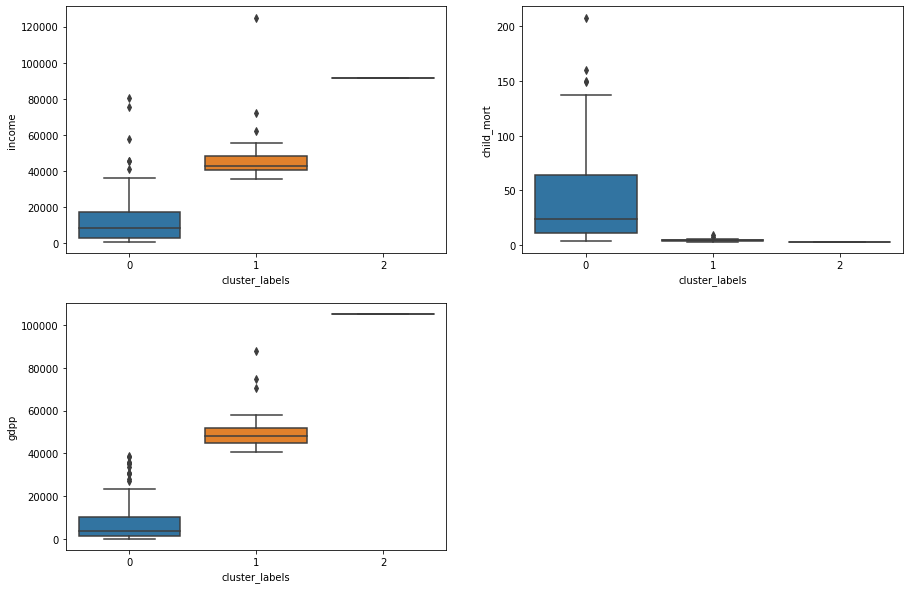

In [118]:
plt.figure(figsize = (15, 10))
for i in enumerate(['income','child_mort','gdpp']):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'cluster_labels', y = i[1], data =country)

* Taking cluster label 0 due to low income, low gdpp and high child mortality

In [119]:
final1=country[country['cluster_labels']==0]

In [120]:
# getting the desired countries by hierarchical clustering
final1.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,3,0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,3,0,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,3,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,3,0,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,3,0,0


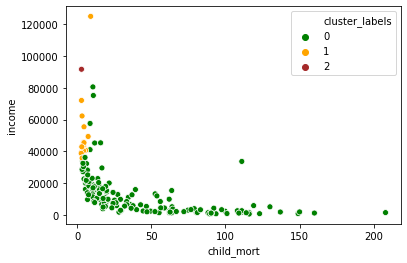

In [121]:
sns.scatterplot(x = 'child_mort', y = 'income', data = country, hue = 'cluster_labels', palette = ['green', 'orange', 'brown'])

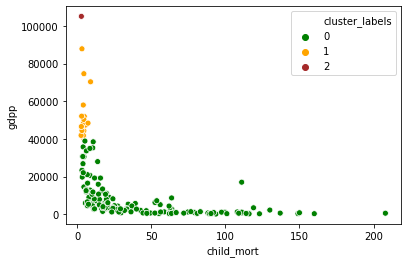

In [122]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', data = country, hue = 'cluster_labels', palette = ['green', 'orange', 'brown'])

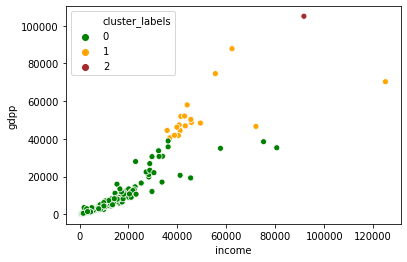

In [123]:
sns.scatterplot(x = 'income', y = 'gdpp', data = country, hue = 'cluster_labels', palette = ['green', 'orange', 'brown'])

Text(0.5, 1.0, 'Hierarchical Clustering')

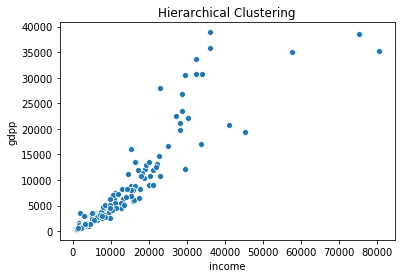

In [124]:
# Cluster of countries that needs to be focussed on
sns.scatterplot(x='income',y='gdpp',data=final1)
plt.title('Hierarchical Clustering')

In [125]:
len(final)

48

In [126]:
len(final1)

148

<function matplotlib.pyplot.show(*args, **kw)>

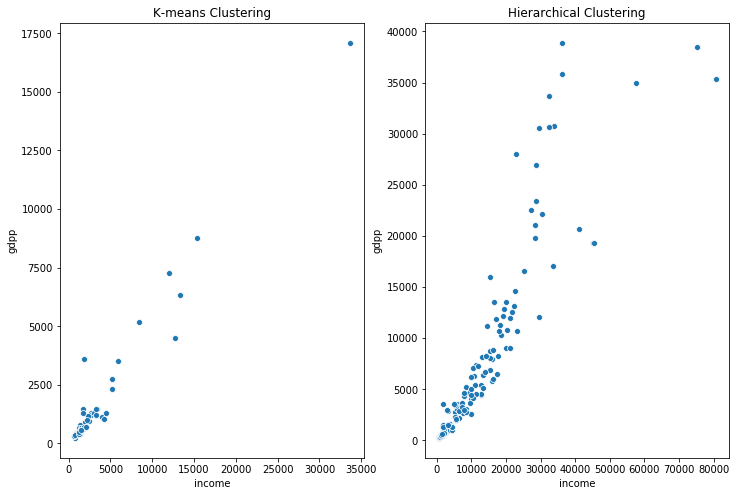

In [127]:
# Comparing cluster formed via k-means versus hierarchical
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
sns.scatterplot(x='income',y='gdpp',data=final)
plt.title("K-means Clustering")

plt.subplot(1,2,2)
sns.scatterplot(x='income',y='gdpp',data=final1)
plt.title('Hierarchical Clustering')
plt.show

In [128]:
final1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels,cluster_labels
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0
mean,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,1.574324,1.290541,0.0
std,40.842101,5484.682850,720.952525,4666.054903,13367.831298,10.955015,8.571251,1.541602,9140.480557,1.024139,0.927680,0.0
min,3.200000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000,0.000000,0.000000,0.0
25%,11.425000,391.362500,66.567250,451.015000,2910.000000,2.325000,62.975000,1.867500,1272.500000,1.000000,0.000000,0.0
50%,24.100000,1389.790000,227.482000,1564.035000,8510.000000,5.935000,71.300000,2.600000,3885.000000,1.000000,2.000000,0.0
75%,63.625000,4161.375000,629.851500,4075.365000,17500.000000,12.100000,76.025000,4.347500,10400.000000,3.000000,2.000000,0.0
max,208.000000,32283.000000,3749.960000,32494.000000,80600.000000,104.000000,81.900000,7.490000,38900.000000,3.000000,2.000000,0.0


In [129]:
final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.979167,0.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.144338,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.000000,0.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,3.000000,0.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,3.000000,0.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,3.000000,0.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,3.000000,0.0


* We use K-Means clustering to define the final data due hierarchical clustering giving vast data. 
* K-Means cluster results in a more concentrated data taking important factors under consideration

In [130]:
final.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True],inplace=True)

In [131]:
final.reset_index(inplace=True,drop=True)

In [132]:

final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
0,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,3,0
1,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,3,0
2,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,3,0
3,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,3,0
4,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,3,0
5,Nigeria,130.0,589.4900,118.1310,405.420,5150,104.000,60.5,5.84,2330,2,0
6,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,3,0
7,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,3,0
8,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,3,0
9,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,3,0


In [133]:
# taking countries with child mort > 25 percentile of child_mort and gdpp < 75 percentile of gdpp
f=final[final['child_mort']>final['child_mort'].quantile(0.25)]

In [134]:
f1=f[f['gdpp']<final['gdpp'].quantile(0.75)]
f1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
0,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,3,0
1,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,3,0
2,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,3,0
3,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,3,0
4,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,3,0
6,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,3,0
8,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,3,0
9,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,3,0
10,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,3,0
11,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,3,0


In [135]:
f2=f1[f1['income']<final['income'].quantile(0.75)].reset_index(drop=True)
f2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
0,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,3,0
1,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,3,0
2,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,3,0
3,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,3,0
4,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,3,0
5,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,3,0
6,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,3,0
7,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,3,0
8,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,3,0
9,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,3,0


In [136]:
f2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_s,labels
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,107.500000,204.059007,45.325175,325.877964,1684.392857,8.017321,56.971429,5.385714,717.750000,3.0,0.0
std,30.871634,170.907261,23.133439,227.225242,780.230751,5.881789,6.898892,0.895402,346.420492,0.0,0.0
min,66.800000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,3.0,0.0
25%,89.025000,96.340250,31.729300,170.701000,1150.000000,3.645000,55.450000,5.042500,455.750000,3.0,0.0
50%,100.350000,132.870500,39.694550,264.066000,1520.000000,5.930000,57.600000,5.325000,621.500000,3.0,0.0
75%,116.000000,259.455000,53.092375,398.929750,2112.500000,12.150000,59.825000,5.832500,922.750000,3.0,0.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,7.490000,1460.000000,3.0,0.0


In [137]:
# final list of countries:
finallist=f2['country'].to_list()
finallist

['Haiti',
 'Sierra Leone',
 'Chad',
 'Central African Republic',
 'Mali',
 'Niger',
 'Congo, Dem. Rep.',
 'Burkina Faso',
 'Guinea-Bissau',
 'Benin',
 "Cote d'Ivoire",
 'Guinea',
 'Cameroon',
 'Mozambique',
 'Lesotho',
 'Mauritania',
 'Burundi',
 'Malawi',
 'Togo',
 'Afghanistan',
 'Liberia',
 'Comoros',
 'Zambia',
 'Uganda',
 'Gambia',
 'Ghana',
 'Tanzania',
 'Senegal']